<a href="https://colab.research.google.com/github/cIgbafe2020/Covid_19_Times-Series-Data-Analysis-/blob/main/RedI_School_Final_Project_on_Covid_19_Times_Series_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project Task: 

Compare how covid-19 affected a specific country (any country you want to choose), its region, and the world, using the above covid dataset. Use visualization tools, and data analysis tools. Write a report, including a jupyter notebook and a pdf, explaining your conclusion with the use of graphs and of text.



In [ ]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly



In [ ]:
df_confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df_deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
df_recovered = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [ ]:
df_confirmed.head()

Province/State Country/Region       Lat  ...  12/9/20  12/10/20  12/11/20
0            NaN    Afghanistan  33.93911  ...    47851     48053     48116
1            NaN        Albania  41.15330  ...    45188     46061     46863
2            NaN        Algeria  28.03390  ...    90014     90579     91121
3            NaN        Andorra  42.50630  ...     7162      7190      7236
4            NaN         Angola -11.20270  ...    15804     15925     16061

[5 rows x 329 columns]

In [ ]:
## Reshaping Confirmed dataframe
df1_confirmed = df_confirmed.melt(id_vars=['Province/State', 'Country/Region', 'Lat','Long'], var_name='Date', value_name ='Confirmed')
df1_confirmed

Province/State      Country/Region  ...      Date  Confirmed
0                NaN         Afghanistan  ...   1/22/20          0
1                NaN             Albania  ...   1/22/20          0
2                NaN             Algeria  ...   1/22/20          0
3                NaN             Andorra  ...   1/22/20          0
4                NaN              Angola  ...   1/22/20          0
...              ...                 ...  ...       ...        ...
88070            NaN             Vietnam  ...  12/11/20       1391
88071            NaN  West Bank and Gaza  ...  12/11/20     106622
88072            NaN               Yemen  ...  12/11/20       2082
88073            NaN              Zambia  ...  12/11/20      18161
88074            NaN            Zimbabwe  ...  12/11/20      11162

[88075 rows x 6 columns]

In [ ]:
# Reshaping Deaths dataframe
df1_deaths= df_deaths.melt(id_vars =['Province/State', 'Country/Region', 'Lat','Long'], var_name='Date', value_name ='Deaths')

df1_deaths

Province/State      Country/Region  ...      Date  Deaths
0                NaN         Afghanistan  ...   1/22/20       0
1                NaN             Albania  ...   1/22/20       0
2                NaN             Algeria  ...   1/22/20       0
3                NaN             Andorra  ...   1/22/20       0
4                NaN              Angola  ...   1/22/20       0
...              ...                 ...  ...       ...     ...
88070            NaN             Vietnam  ...  12/11/20      35
88071            NaN  West Bank and Gaza  ...  12/11/20     931
88072            NaN               Yemen  ...  12/11/20     606
88073            NaN              Zambia  ...  12/11/20     365
88074            NaN            Zimbabwe  ...  12/11/20     306

[88075 rows x 6 columns]

In [ ]:
##Reshaping recovered dataframe
df_recovered= df_recovered.melt(id_vars=['Province/State', 'Country/Region', 'Lat','Long'], var_name='Date', value_name ='Recovered')
df_recovered

Province/State      Country/Region  ...      Date  Recovered
0                NaN         Afghanistan  ...   1/22/20          0
1                NaN             Albania  ...   1/22/20          0
2                NaN             Algeria  ...   1/22/20          0
3                NaN             Andorra  ...   1/22/20          0
4                NaN              Angola  ...   1/22/20          0
...              ...                 ...  ...       ...        ...
83195            NaN             Vietnam  ...  12/11/20       1238
83196            NaN  West Bank and Gaza  ...  12/11/20      81166
83197            NaN               Yemen  ...  12/11/20       1383
83198            NaN              Zambia  ...  12/11/20      17329
83199            NaN            Zimbabwe  ...  12/11/20       9324

[83200 rows x 6 columns]

In [ ]:
## Joining the three(3) dadataframes
df_final = pd.merge(df1_confirmed, df1_deaths, on=['Province/State','Country/Region','Lat','Long','Date'])
df_final

Province/State      Country/Region  ...  Confirmed  Deaths
0                NaN         Afghanistan  ...          0       0
1                NaN             Albania  ...          0       0
2                NaN             Algeria  ...          0       0
3                NaN             Andorra  ...          0       0
4                NaN              Angola  ...          0       0
...              ...                 ...  ...        ...     ...
88070            NaN             Vietnam  ...       1391      35
88071            NaN  West Bank and Gaza  ...     106622     931
88072            NaN               Yemen  ...       2082     606
88073            NaN              Zambia  ...      18161     365
88074            NaN            Zimbabwe  ...      11162     306

[88075 rows x 7 columns]

In [ ]:
dataset_final = df_final.merge(df_recovered, on=['Province/State','Country/Region','Lat','Long','Date'])
dataset_final

Province/State      Country/Region  ...  Deaths  Recovered
0                NaN         Afghanistan  ...       0          0
1                NaN             Albania  ...       0          0
2                NaN             Algeria  ...       0          0
3                NaN             Andorra  ...       0          0
4                NaN              Angola  ...       0          0
...              ...                 ...  ...     ...        ...
81245            NaN             Vietnam  ...      35       1238
81246            NaN  West Bank and Gaza  ...     931      81166
81247            NaN               Yemen  ...     606       1383
81248            NaN              Zambia  ...     365      17329
81249            NaN            Zimbabwe  ...     306       9324

[81250 rows x 8 columns]

In [ ]:
## Calculating active cases per country

dataset_final['Active_cases'] = dataset_final['Confirmed'] - dataset_final['Deaths']-dataset_final['Recovered']
dataset_final.sort_values(by='Deaths', ascending=False)

Province/State Country/Region       Lat  ...  Deaths Recovered  Active_cases
81226            NaN             US  40.00000  ...  295450   6135314       9412025
80976            NaN             US  40.00000  ...  292141   5985047       9333826
80726            NaN             US  40.00000  ...  289373   5889896       9207293
80476            NaN             US  40.00000  ...  286249   5786915       9092131
80226            NaN             US  40.00000  ...  283703   5714557       8951157
...              ...            ...       ...  ...     ...       ...           ...
10333  Faroe Islands        Denmark  61.89260  ...       0         0             0
52319          Tibet          China  31.69270  ...       0         1             0
52316         Shanxi          China  37.57770  ...       0       201             0
52312        Qinghai          China  35.74520  ...       0        18             0
0                NaN    Afghanistan  33.93911  ...       0         0             0

[81250 rows x 9 columns]

In [ ]:
fig = px.line(dataset_final, x='Date', y='Confirmed')

fig.show()

In [ ]:

fig = px.line(dataset_final, x='Date', y='Deaths')

fig.show()

In [ ]:
plt.figure(figsize=(10,10))

fig = px.line(dataset_final, x='Date', y='Recovered')

fig.show()

<Figure size 720x720 with 0 Axes>

In [ ]:

px.line(dataset_final, x='Date', y='Active_cases')

In [ ]:
#Renaming the columns
dataset_final.rename(columns={'Province/State' : 'Province', 'Country/Region': 'Country'}, inplace=True)
dataset_final

Province             Country        Lat  ...  Deaths Recovered  Active_cases
0          NaN         Afghanistan  33.939110  ...       0         0             0
1          NaN             Albania  41.153300  ...       0         0             0
2          NaN             Algeria  28.033900  ...       0         0             0
3          NaN             Andorra  42.506300  ...       0         0             0
4          NaN              Angola -11.202700  ...       0         0             0
...        ...                 ...        ...  ...     ...       ...           ...
81245      NaN             Vietnam  14.058324  ...      35      1238           118
81246      NaN  West Bank and Gaza  31.952200  ...     931     81166         24525
81247      NaN               Yemen  15.552727  ...     606      1383            93
81248      NaN              Zambia -13.133897  ...     365     17329           467
81249      NaN            Zimbabwe -19.015438  ...     306      9324          1532

[81250 rows x 9 columns]

In [ ]:
## sorting function used to ascertain global Confirmed cases

dataset_final.sort_values('Date', ascending=False)

Province             Country        Lat  ...  Deaths Recovered  Active_cases
57813  Shaanxi               China  35.191700  ...       3       364            11
57828      NaN       Cote d'Ivoire   7.540000  ...     119     17770           926
57841      NaN               Egypt  26.820553  ...    5577     80689         14137
57840      NaN             Ecuador  -1.831200  ...   10701     91242         10223
57839      NaN  Dominican Republic  18.735700  ...    1914     74305         24718
...        ...                 ...        ...  ...     ...       ...           ...
163        NaN             Moldova  47.411600  ...       0         0             0
162        NaN              Mexico  23.634500  ...       0         0             0
161        NaN           Mauritius -20.348404  ...       0         0             0
160        NaN          Mauritania  21.007900  ...       0         0             0
0          NaN         Afghanistan  33.939110  ...       0         0             0

[81250 rows x 9 columns]

In [ ]:
##sorting function used to ascertain global death cases
dataset_final.sort_values('Deaths', ascending=False)

Province      Country       Lat  ...  Deaths Recovered  Active_cases
81226            NaN           US  40.00000  ...  295450   6135314       9412025
80976            NaN           US  40.00000  ...  292141   5985047       9333826
80726            NaN           US  40.00000  ...  289373   5889896       9207293
80476            NaN           US  40.00000  ...  286249   5786915       9092131
80226            NaN           US  40.00000  ...  283703   5714557       8951157
...              ...          ...       ...  ...     ...       ...           ...
10333  Faroe Islands      Denmark  61.89260  ...       0         0             0
52319          Tibet        China  31.69270  ...       0         1             0
52316         Shanxi        China  37.57770  ...       0       201             0
52312        Qinghai        China  35.74520  ...       0        18             0
0                NaN  Afghanistan  33.93911  ...       0         0             0

[81250 rows x 9 columns]

In [ ]:
##sorting function used to ascertain global recovered cases
dataset_final.sort_values('Recovered', ascending=False)

Province        Country        Lat  ...  Deaths Recovered  Active_cases
81127      NaN          India  20.593684  ...  142628   9324328        359819
80877      NaN          India  20.593684  ...  142185   9290809        363750
80627      NaN          India  20.593684  ...  141772   9253306        372293
80377      NaN          India  20.593684  ...  141360   9215581        378909
80127      NaN          India  20.593684  ...  140958   9178946        383866
...        ...            ...        ...  ...     ...       ...           ...
15619      NaN         Guinea   9.945600  ...       0         0             4
7464       NaN          Sudan  12.862800  ...       0         0             0
15620      NaN  Guinea-Bissau  11.803700  ...       0         0             0
15621      NaN         Guyana   4.860416  ...       1         0             4
0          NaN    Afghanistan  33.939110  ...       0         0             0

[81250 rows x 9 columns]

In [ ]:
dataset_final.sort_values('Active_cases', ascending=False)

Province         Country  ...  Recovered  Active_cases
81226                NaN              US  ...    6135314       9412025
80976                NaN              US  ...    5985047       9333826
80726                NaN              US  ...    5889896       9207293
80476                NaN              US  ...    5786915       9092131
80226                NaN              US  ...    5714557       8951157
...                  ...             ...  ...        ...           ...
32484    Channel Islands  United Kingdom  ...        525           -10
32984    Channel Islands  United Kingdom  ...        528           -13
32734    Channel Islands  United Kingdom  ...        528           -13
33234    Channel Islands  United Kingdom  ...        528           -14
48015  Western Australia       Australia  ...        652           -20

[81250 rows x 9 columns]

In [ ]:
temp_df= dataset_final.groupby(['Country','Date'])['Active_cases'].sum().reset_index()
temp_df

Country     Date  Active_cases
0      Afghanistan  1/22/20             0
1      Afghanistan  1/23/20             0
2      Afghanistan  1/24/20             0
3      Afghanistan  1/25/20             0
4      Afghanistan  1/26/20             0
...            ...      ...           ...
60770     Zimbabwe   9/5/20          1286
60771     Zimbabwe   9/6/20          1286
60772     Zimbabwe   9/7/20          1633
60773     Zimbabwe   9/8/20          1693
60774     Zimbabwe   9/9/20          1665

[60775 rows x 3 columns]

In [ ]:
early_active_cases = temp_df[temp_df['Date']=='3/10/20'].sort_values('Active_cases', ascending = False).head(15)
early_active_cases

Country     Date  Active_cases
11487             China  3/10/20         17559
27412             Italy  3/10/20          8794
29362      Korea, South  3/10/20          7212
26112              Iran  3/10/20          5020
19937            France  3/10/20          1749
51787             Spain  3/10/20          1628
21237           Germany  3/10/20          1437
57637    United Kingdom  3/10/20           863
56337                US  3/10/20           746
15387  Diamond Princess  3/10/20           660
53412       Switzerland  3/10/20           485
28062             Japan  3/10/20           471
53087            Sweden  3/10/20           423
41387            Norway  3/10/20           399
39437       Netherlands  3/10/20           378

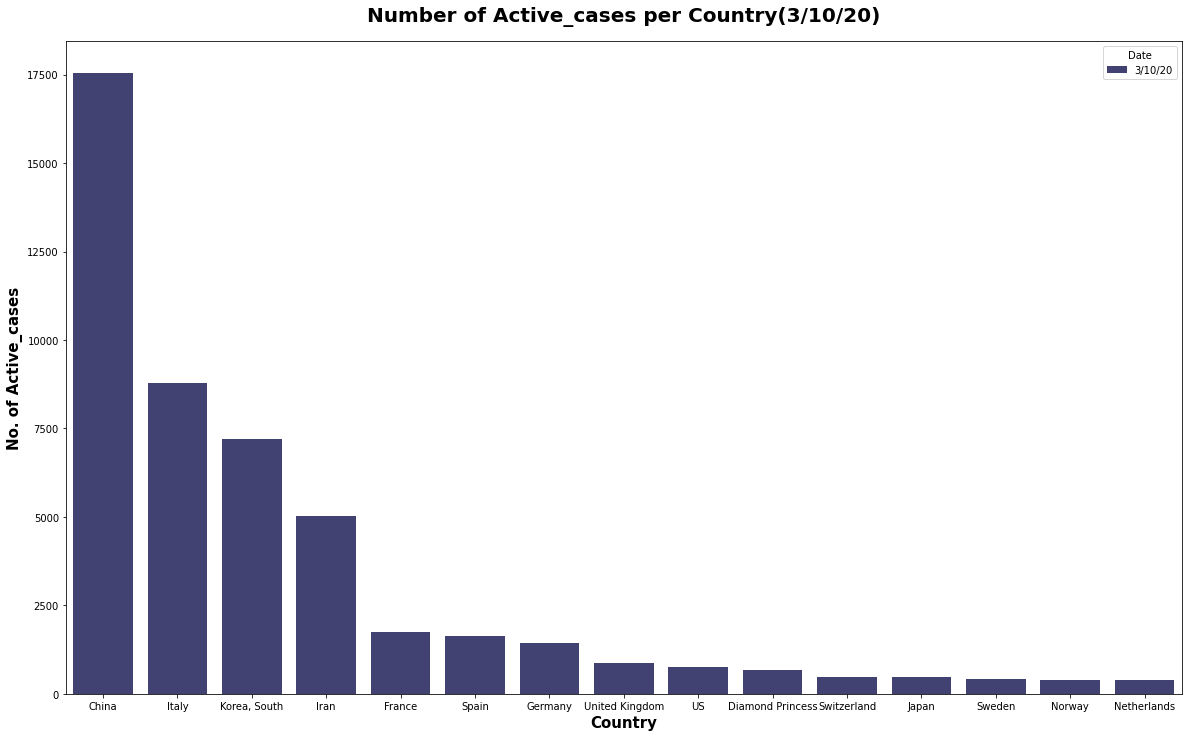

In [ ]:
## Active cases at the early stage of covid_19 outbreak
plt.figure(figsize=(20,12))
sns.barplot(x='Country', y='Active_cases', hue='Date',data=early_active_cases, palette='tab20b')
plt.title('Number of Active_cases per Country(3/10/20)', loc = 'center' , pad= 20, fontsize=20, fontweight="bold");
plt.xlabel('Country', fontsize = 15, fontweight="bold")
plt.ylabel('No. of Active_cases', fontsize = 15, fontweight="bold");

In [ ]:
deaths_groupby = dataset_final.groupby(['Country','Date'])['Deaths'].sum().reset_index()
deaths_groupby

Country     Date  Deaths
0      Afghanistan  1/22/20       0
1      Afghanistan  1/23/20       0
2      Afghanistan  1/24/20       0
3      Afghanistan  1/25/20       0
4      Afghanistan  1/26/20       0
...            ...      ...     ...
60770     Zimbabwe   9/5/20     206
60771     Zimbabwe   9/6/20     206
60772     Zimbabwe   9/7/20     210
60773     Zimbabwe   9/8/20     218
60774     Zimbabwe   9/9/20     222

[60775 rows x 3 columns]

In [ ]:
early_death_cases = deaths_groupby[deaths_groupby['Date']=='3/10/20'].sort_values('Deaths', ascending = False).head(15)
early_death_cases

Country     Date  Deaths
11487             China  3/10/20    3111
27412             Italy  3/10/20     631
26112              Iran  3/10/20     291
29362      Korea, South  3/10/20      54
51787             Spain  3/10/20      35
19937            France  3/10/20      33
56337                US  3/10/20      28
28062             Japan  3/10/20      13
26437              Iraq  3/10/20       7
57637    United Kingdom  3/10/20       7
15387  Diamond Princess  3/10/20       6
39437       Netherlands  3/10/20       4
2712          Australia  3/10/20       3
53412       Switzerland  3/10/20       3
47237        San Marino  3/10/20       2

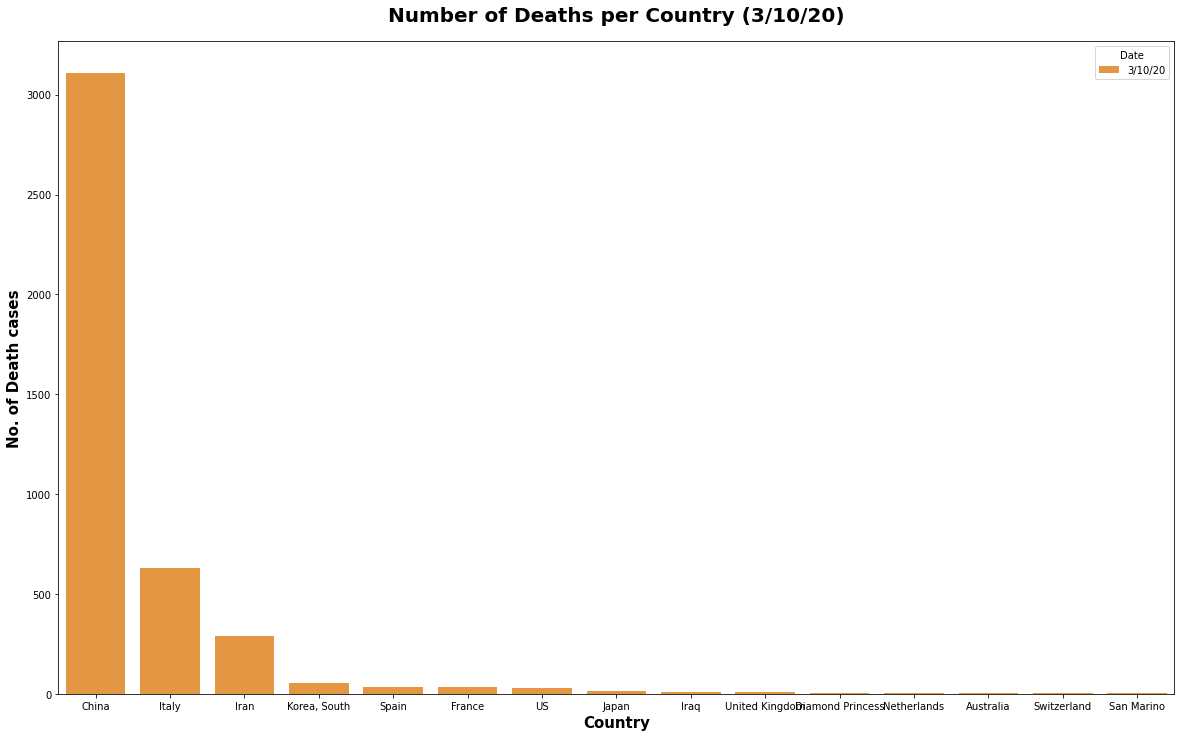

In [ ]:
plt.figure(figsize=(20,12))
sns.barplot(x='Country', y='Deaths', hue='Date',data=early_death_cases, palette='YlOrBr')
plt.title('Number of Deaths per Country (3/10/20)', loc = 'center' , pad= 20, fontsize=20, fontweight="bold");
plt.xlabel('Country', fontsize = 15, fontweight="bold")
plt.ylabel('No. of Death cases', fontsize = 15, fontweight="bold");

In [ ]:
death_cases_July= deaths_groupby[deaths_groupby['Date']=='7/31/20'].sort_values('Deaths', ascending = False).head(15)
death_cases_July

Country     Date  Deaths
55960              US  7/31/20  154093
7660           Brazil  7/31/20   92475
36640          Mexico  7/31/20   46688
57248  United Kingdom  7/31/20   41274
25370           India  7/31/20   36511
27302           Italy  7/31/20   35141
19896          France  7/31/20   30268
51452           Spain  7/31/20   28445
43080            Peru  7/31/20   19021
26014            Iran  7/31/20   16766
45012          Russia  7/31/20   13939
11846        Colombia  7/31/20   10105
5406          Belgium  7/31/20    9841
11202           Chile  7/31/20    9457
21184         Germany  7/31/20    9147

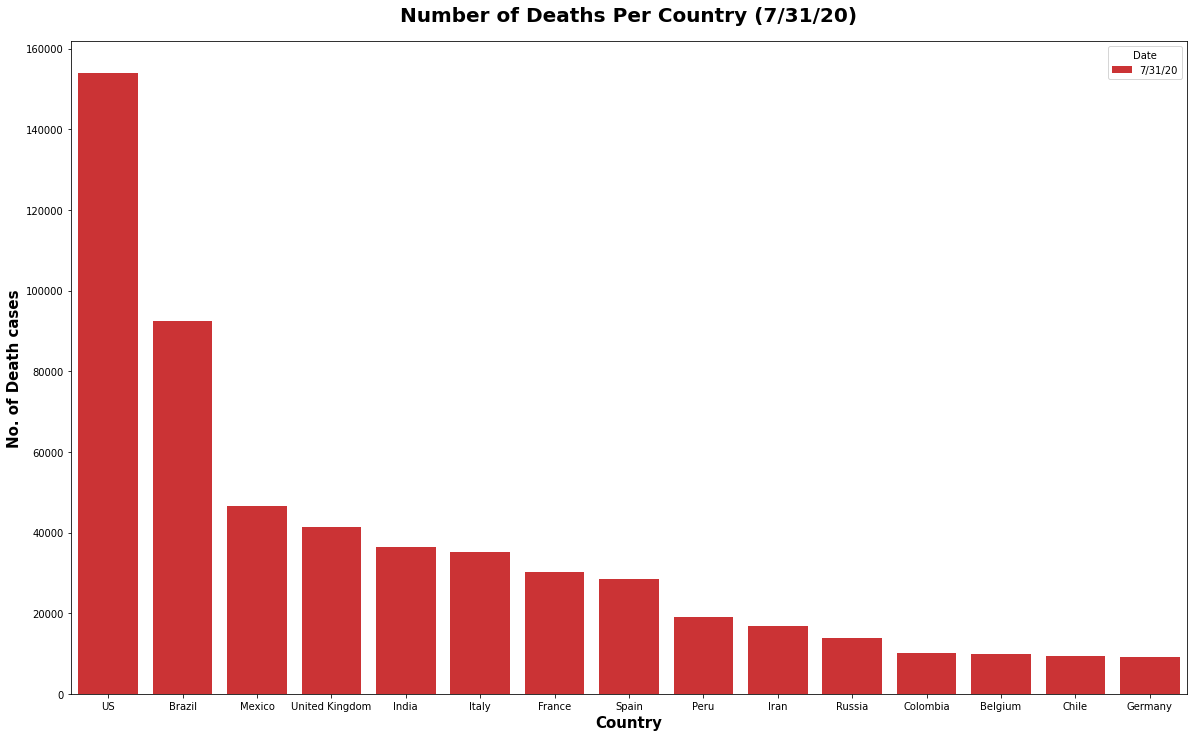

In [ ]:
plt.figure(figsize=(20,12))
sns.barplot(x='Country', y='Deaths', hue='Date',data=death_cases_July, palette='Set1')

plt.title('Number of Deaths Per Country (7/31/20)', loc = 'center' , pad= 20, fontsize=20, fontweight="bold");
plt.xlabel('Country', fontsize = 15, fontweight="bold")
plt.ylabel('No. of Death cases', fontsize = 15, fontweight="bold");

In [ ]:
active_cases_July = temp_df[temp_df['Date']=='7/31/20'].sort_values('Active_cases', ascending = False).head(15)
active_cases_July

Country     Date  Active_cases
55960              US  7/31/20       2959301
25370           India  7/31/20        565103
7660           Brazil  7/31/20        561156
57248  United Kingdom  7/31/20        262080
45012          Russia  7/31/20        187305
50808    South Africa  7/31/20        159007
11846        Colombia  7/31/20        131016
19896          France  7/31/20        113165
51452           Spain  7/31/20        109701
43080            Peru  7/31/20        104556
2186        Argentina  7/31/20        103979
4440       Bangladesh  7/31/20         99414
52740          Sweden  7/31/20         71310
36640          Mexico  7/31/20         50834
6694          Bolivia  7/31/20         50230

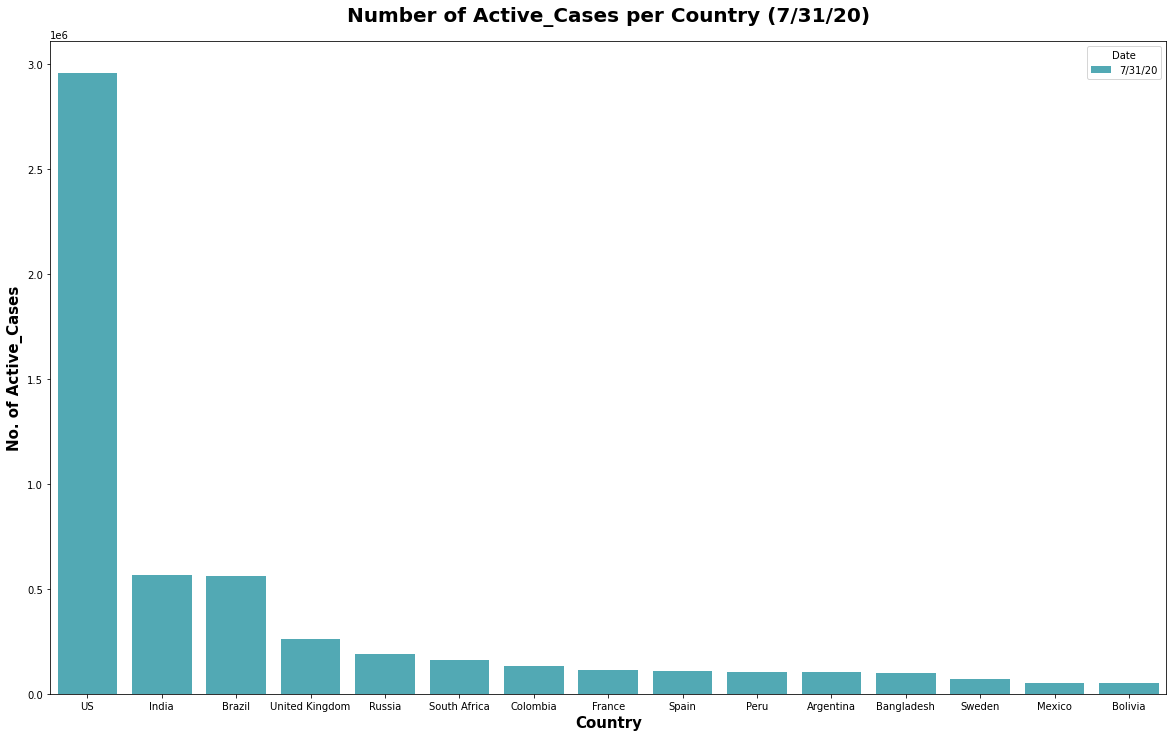

In [ ]:
plt.figure(figsize=(20,12))
sns.barplot(x='Country', y='Active_cases', hue='Date', data=active_cases_July, palette= 'YlGnBu_r');
plt.title('Number of Active_Cases per Country (7/31/20)', loc = 'center', pad= 20, fontsize=20, fontweight="bold")
plt.xlabel('Country', fontsize = 15, fontweight="bold")
plt.ylabel('No. of Active_Cases', fontsize = 15, fontweight="bold");

In [ ]:
temp_df = dataset_final.groupby(['Country', 'Date'])['Active_cases'].sum().reset_index()
temp_df


Country     Date  Active_cases
0      Afghanistan  1/22/20             0
1      Afghanistan  1/23/20             0
2      Afghanistan  1/24/20             0
3      Afghanistan  1/25/20             0
4      Afghanistan  1/26/20             0
...            ...      ...           ...
60209     Zimbabwe   9/5/20          1286
60210     Zimbabwe   9/6/20          1286
60211     Zimbabwe   9/7/20          1633
60212     Zimbabwe   9/8/20          1693
60213     Zimbabwe   9/9/20          1665

[60214 rows x 3 columns]

In [ ]:
countries_death_df = dataset_final.groupby(['Country', 'Date'])['Deaths'].sum().reset_index()
countries_death_df


Country     Date  Deaths
0      Afghanistan  1/22/20       0
1      Afghanistan  1/23/20       0
2      Afghanistan  1/24/20       0
3      Afghanistan  1/25/20       0
4      Afghanistan  1/26/20       0
...            ...      ...     ...
60209     Zimbabwe   9/5/20     206
60210     Zimbabwe   9/6/20     206
60211     Zimbabwe   9/7/20     210
60212     Zimbabwe   9/8/20     218
60213     Zimbabwe   9/9/20     222

[60214 rows x 3 columns]

In [ ]:
countries_death_cases = countries_death_df[countries_death_df['Date']=='12/2/20'].sort_values('Deaths', ascending = False).head(15)
countries_death_cases


Country     Date  Deaths
55778              US  12/2/20  273446
7478           Brazil  12/2/20  174515
25188           India  12/2/20  138648
36458          Mexico  12/2/20  107565
57066  United Kingdom  12/2/20   59796
27120           Italy  12/2/20   57045
19714          France  12/2/20   53906
25832            Iran  12/2/20   48990
51270           Spain  12/2/20   45784
44830          Russia  12/2/20   40630
2004        Argentina  12/2/20   39156
11664        Colombia  12/2/20   37117
42898            Peru  12/2/20   35966
50626    South Africa  12/2/20   21709
43542          Poland  12/2/20   18208

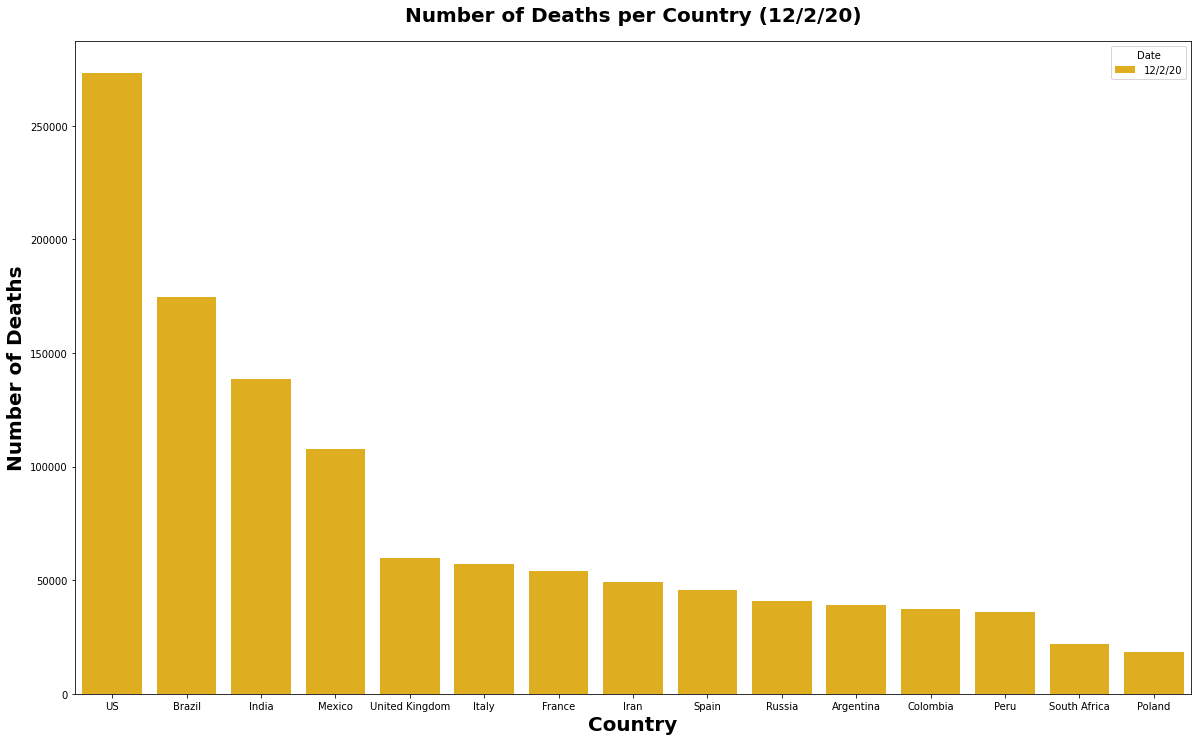

In [ ]:
plt.figure(figsize=(20,12))
sns.barplot(x='Country', y='Deaths', hue='Date', data=countries_death_cases, palette='Wistia')
plt.title('Number of Deaths per Country (12/2/20)', loc = 'center' , pad= 20, fontsize=20, fontweight="bold")
plt.xlabel('Country', fontsize=20, fontweight="bold")
plt.ylabel('Number of Deaths', fontsize=20, fontweight="bold");

In [ ]:

## The number of unique countries under consideration
dataset_final['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guinea', 'Guin

In [ ]:
## 187 countries have been affacted globally
len(dataset_final['Country'].unique())

187

In [ ]:
##number of provinces affected
dataset_final.Province.unique()

array([nan, 'Australian Capital Territory', 'New South Wales',
       'Northern Territory', 'Queensland', 'South Australia', 'Tasmania',
       'Victoria', 'Western Australia', 'Anhui', 'Beijing', 'Chongqing',
       'Fujian', 'Gansu', 'Guangdong', 'Guangxi', 'Guizhou', 'Hainan',
       'Heilongjiang', 'Hong Kong', 'Hubei', 'Hunan', 'Inner Mongolia',
       'Jiangsu', 'Jiangxi', 'Jilin', 'Liaoning', 'Macau', 'Ningxia',
       'Qinghai', 'Shaanxi', 'Shandong', 'Shanghai', 'Shanxi', 'Sichuan',
       'Tianjin', 'Tibet', 'Xinjiang', 'Yunnan', 'Zhejiang',
       'Faroe Islands', 'Greenland', 'French Guiana', 'French Polynesia',
       'Guadeloupe', 'Martinique', 'Mayotte', 'New Caledonia', 'Reunion',
       'Saint Barthelemy', 'Saint Pierre and Miquelon', 'St Martin',
       'Aruba', 'Bonaire, Sint Eustatius and Saba', 'Curacao',
       'Sint Maarten', 'Anguilla', 'Bermuda', 'British Virgin Islands',
       'Cayman Islands', 'Channel Islands', 'Falkland Islands (Malvinas)',
       'Gibralt

In [ ]:
## there are 66 provinces global under consideration
len(dataset_final.Province.unique())

66

In [ ]:
## Checking for NaN values
dataset_final.isnull().sum()

Province        59570
Country             0
Lat                 0
Long                0
Date                0
Confirmed           0
Deaths              0
Recovered           0
Active_cases        0
dtype: int64

In [ ]:
# groupby function country to get the max aggregate
dataset_final.groupby(['Country'])[['Confirmed', 'Recovered','Deaths']].max()

Confirmed  Recovered  Deaths
Country                                         
Afghanistan             47716      37920    1906
Albania                 44436      22527     936
Algeria                 89416      58146    2539
Andorra                  7127       6367      78
Angola                  15729       8470     355
...                       ...        ...     ...
Vietnam                  1377       1224      35
West Bank and Gaza     101109      75257     867
Yemen                    2383       1554     649
Zambia                  17963      17268     364
Zimbabwe                10912       9062     303

[187 rows x 3 columns]

In [ ]:
# grouping cases based on province and Country
dataset_final.groupby(['Province', 'Country'])[['Confirmed', 'Recovered','Deaths', 'Active_cases']].max()

Confirmed  ...  Active_cases
Province                     Country                    ...              
Anguilla                     United Kingdom         10  ...             7
Anhui                        China                 992  ...           758
Aruba                        Netherlands          4984  ...          1630
Australian Capital Territory Australia             117  ...            76
Beijing                      China                 952  ...           326
...                                                ...  ...           ...
Victoria                     Australia           20347  ...          8490
Western Australia            Australia             832  ...           358
Xinjiang                     China                 980  ...           643
Yunnan                       China                 221  ...           133
Zhejiang                     China                1295  ...           883

[65 rows x 4 columns]

In [ ]:
 dataset_final.groupby('Country')['Confirmed'].max()

Country
Afghanistan            47716
Albania                44436
Algeria                89416
Andorra                 7127
Angola                 15729
                       ...  
Vietnam                 1377
West Bank and Gaza    101109
Yemen                   2383
Zambia                 17963
Zimbabwe               10912
Name: Confirmed, Length: 187, dtype: int64

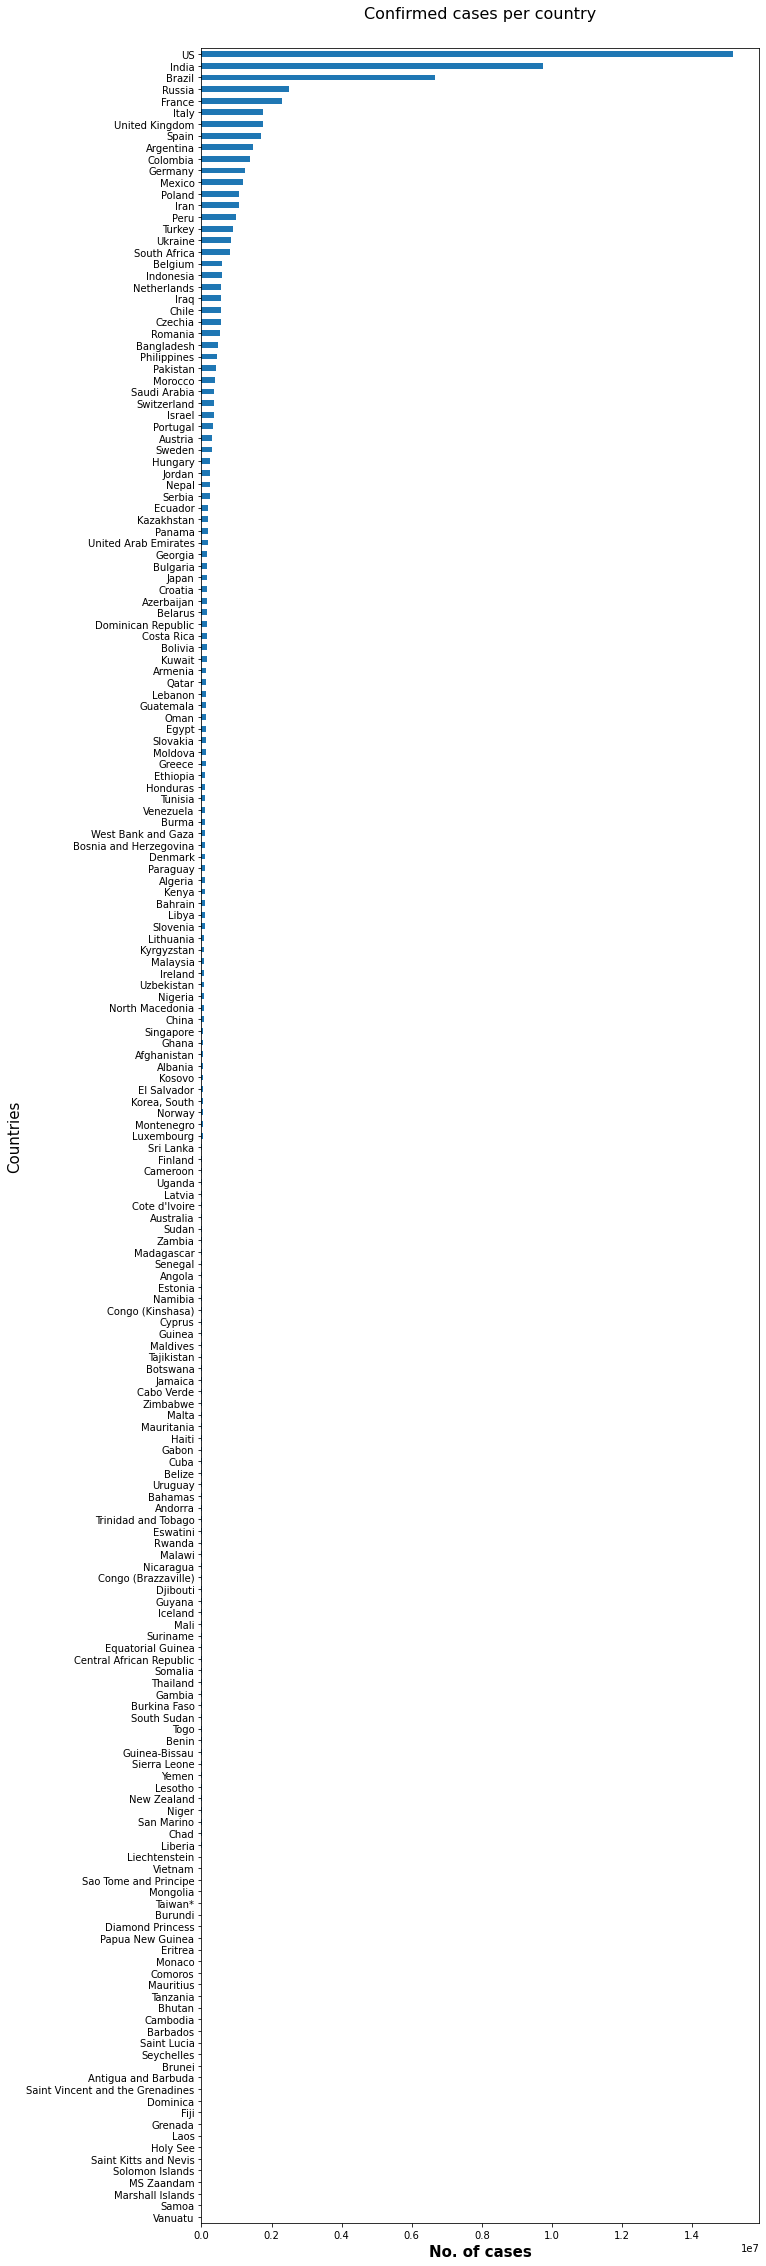

In [ ]:
# Global visualisation based on number of cases 
plt.figure(figsize=(10,40))
dataset_final.groupby('Country')['Confirmed'].max().sort_values().plot(kind='barh')
plt.title('Confirmed cases per country', loc = 'center', pad= 30, fontsize=16)
plt.xlabel('No. of cases', fontsize = 15, fontweight="bold")
plt.ylabel('Countries', fontsize = 15);


In [ ]:
dataset_final.groupby('Country')['Deaths'].sum()

Country
Afghanistan           249865
Albania                63553
Algeria               316540
Andorra                13632
Angola                 27955
                       ...  
Vietnam                 4103
West Bank and Gaza     48607
Yemen                  95291
Zambia                 44420
Zimbabwe               29170
Name: Deaths, Length: 187, dtype: int64

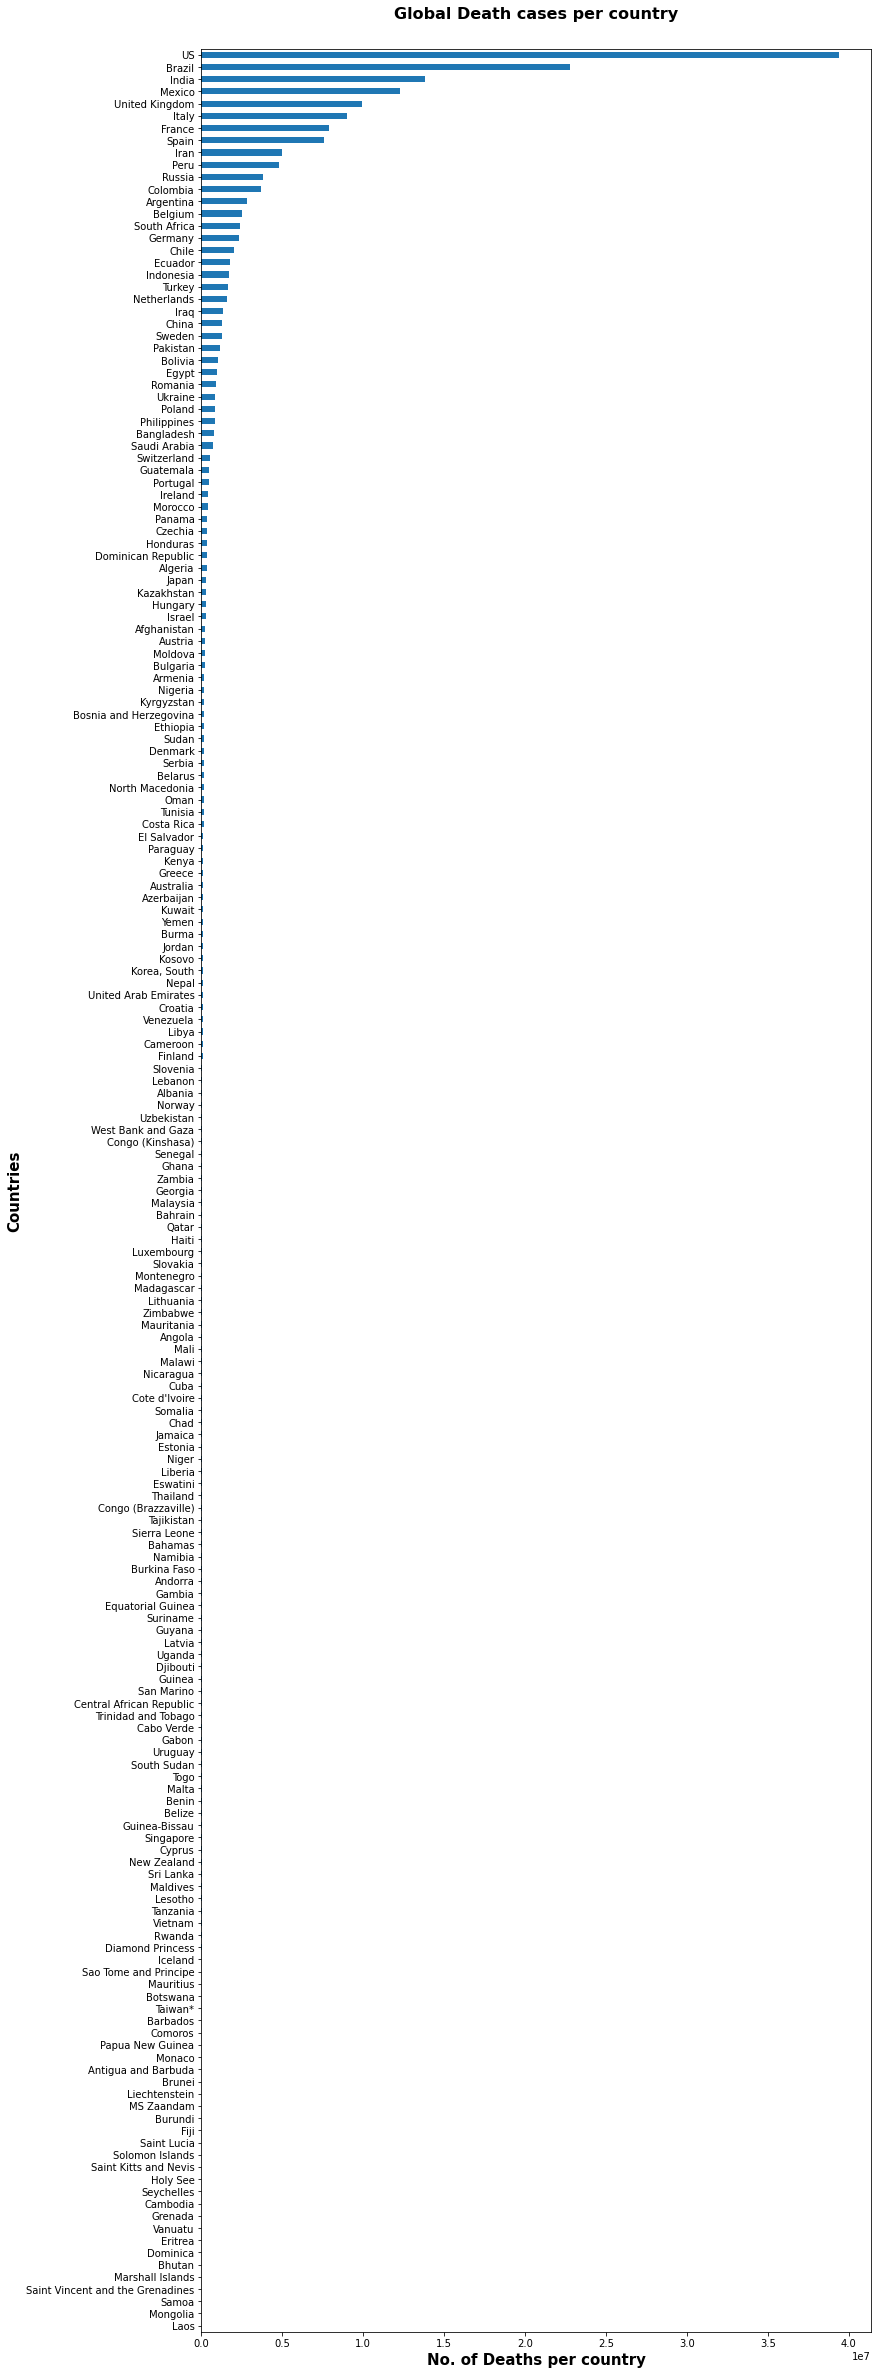

In [ ]:
plt.figure(figsize=(12,42))
dataset_final.groupby('Country')['Deaths'].sum().sort_values().plot(kind='barh')
plt.title('Global Death cases per country', loc = 'center', pad= 30, fontsize=16, fontweight="bold")
plt.xlabel('No. of Deaths per country', fontsize = 15, fontweight="bold")
plt.ylabel('Countries', fontsize = 15, fontweight="bold");

In [ ]:
dataset_final.groupby('Country')['Recovered'].sum().sort_values(ascending=False)

Country
India               730550578
Brazil              606852916
US                  466416884
Russia              168598743
Colombia             99834338
                      ...    
Marshall Islands           44
MS Zaandam                 42
Vanuatu                     6
Samoa                       4
Sweden                      0
Name: Recovered, Length: 187, dtype: int64

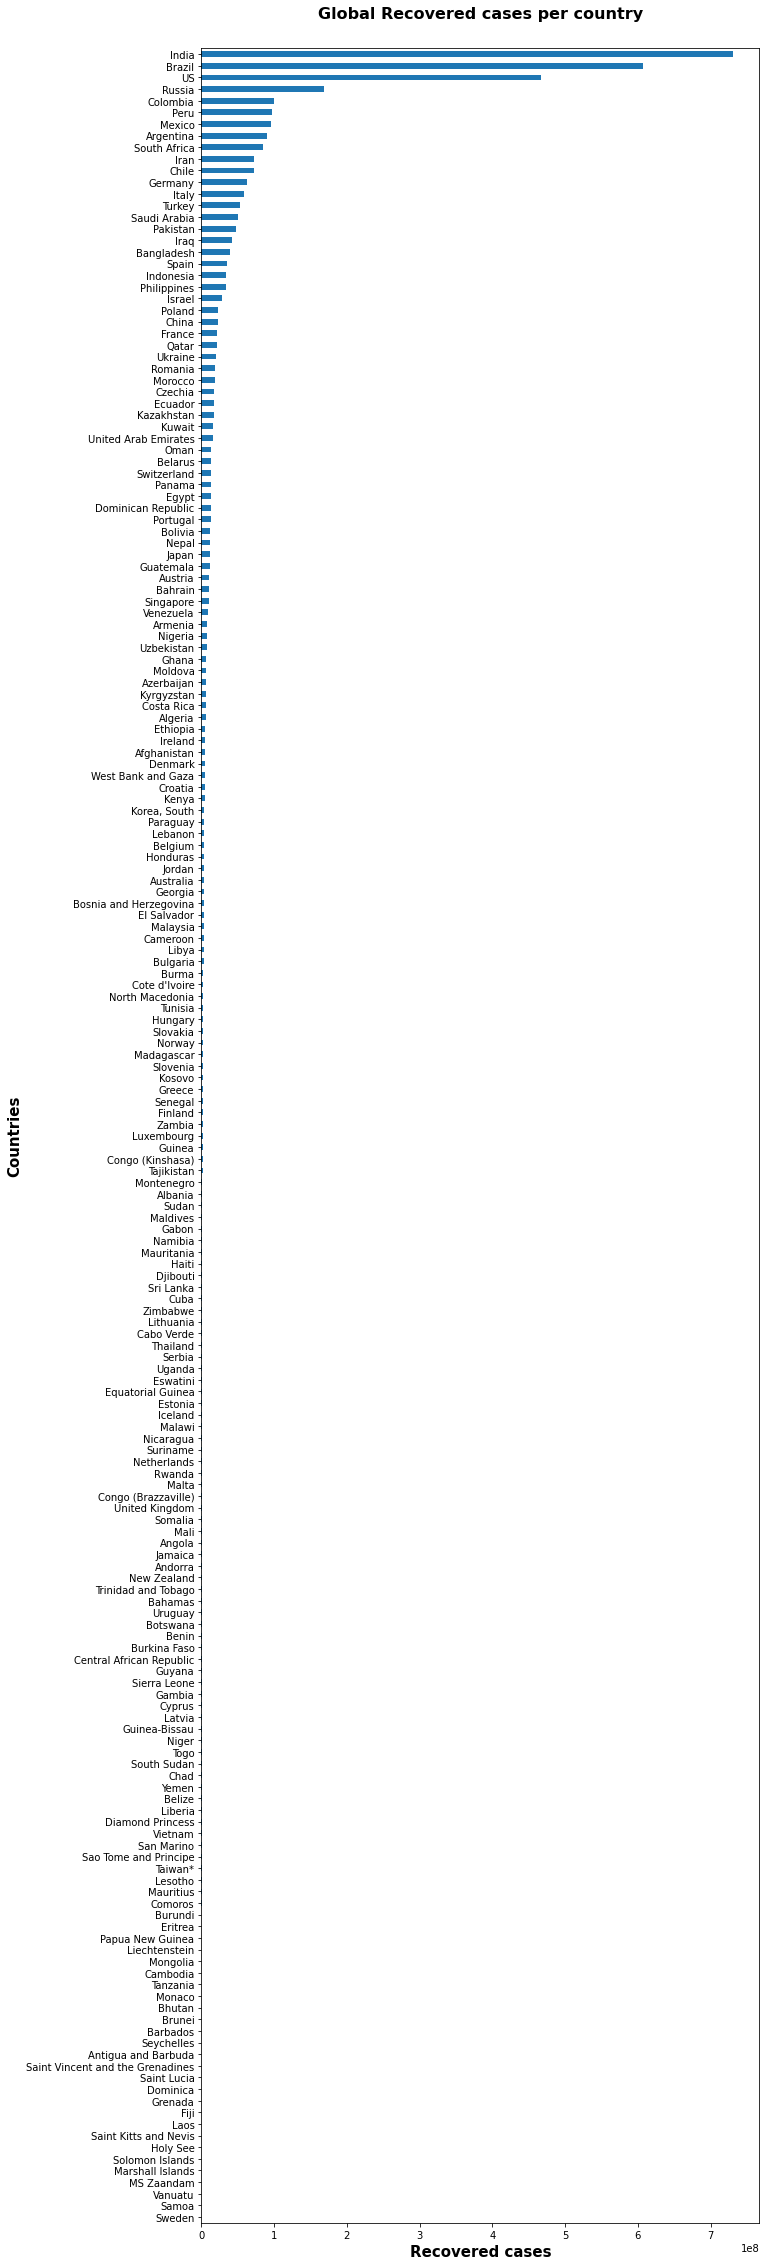

In [ ]:
plt.figure(figsize=(10,40))
dataset_final.groupby('Country')['Recovered'].sum().sort_values().plot(kind='barh')
plt.title('Global Recovered cases per country', loc = 'center', pad= 30, fontsize=16, fontweight="bold")
plt.xlabel('Recovered cases', fontsize = 15, fontweight="bold")
plt.ylabel('Countries', fontsize = 15, fontweight="bold");

In [ ]:
dataset_final.groupby('Country')['Active_cases'].sum()

Country
Afghanistan           1999912
Albania               1108264
Algeria               2387772
Andorra                102074
Angola                 502833
                       ...   
Vietnam                 30205
West Bank and Gaza    1398342
Yemen                   50063
Zambia                 133412
Zimbabwe               201120
Name: Active_cases, Length: 187, dtype: int64

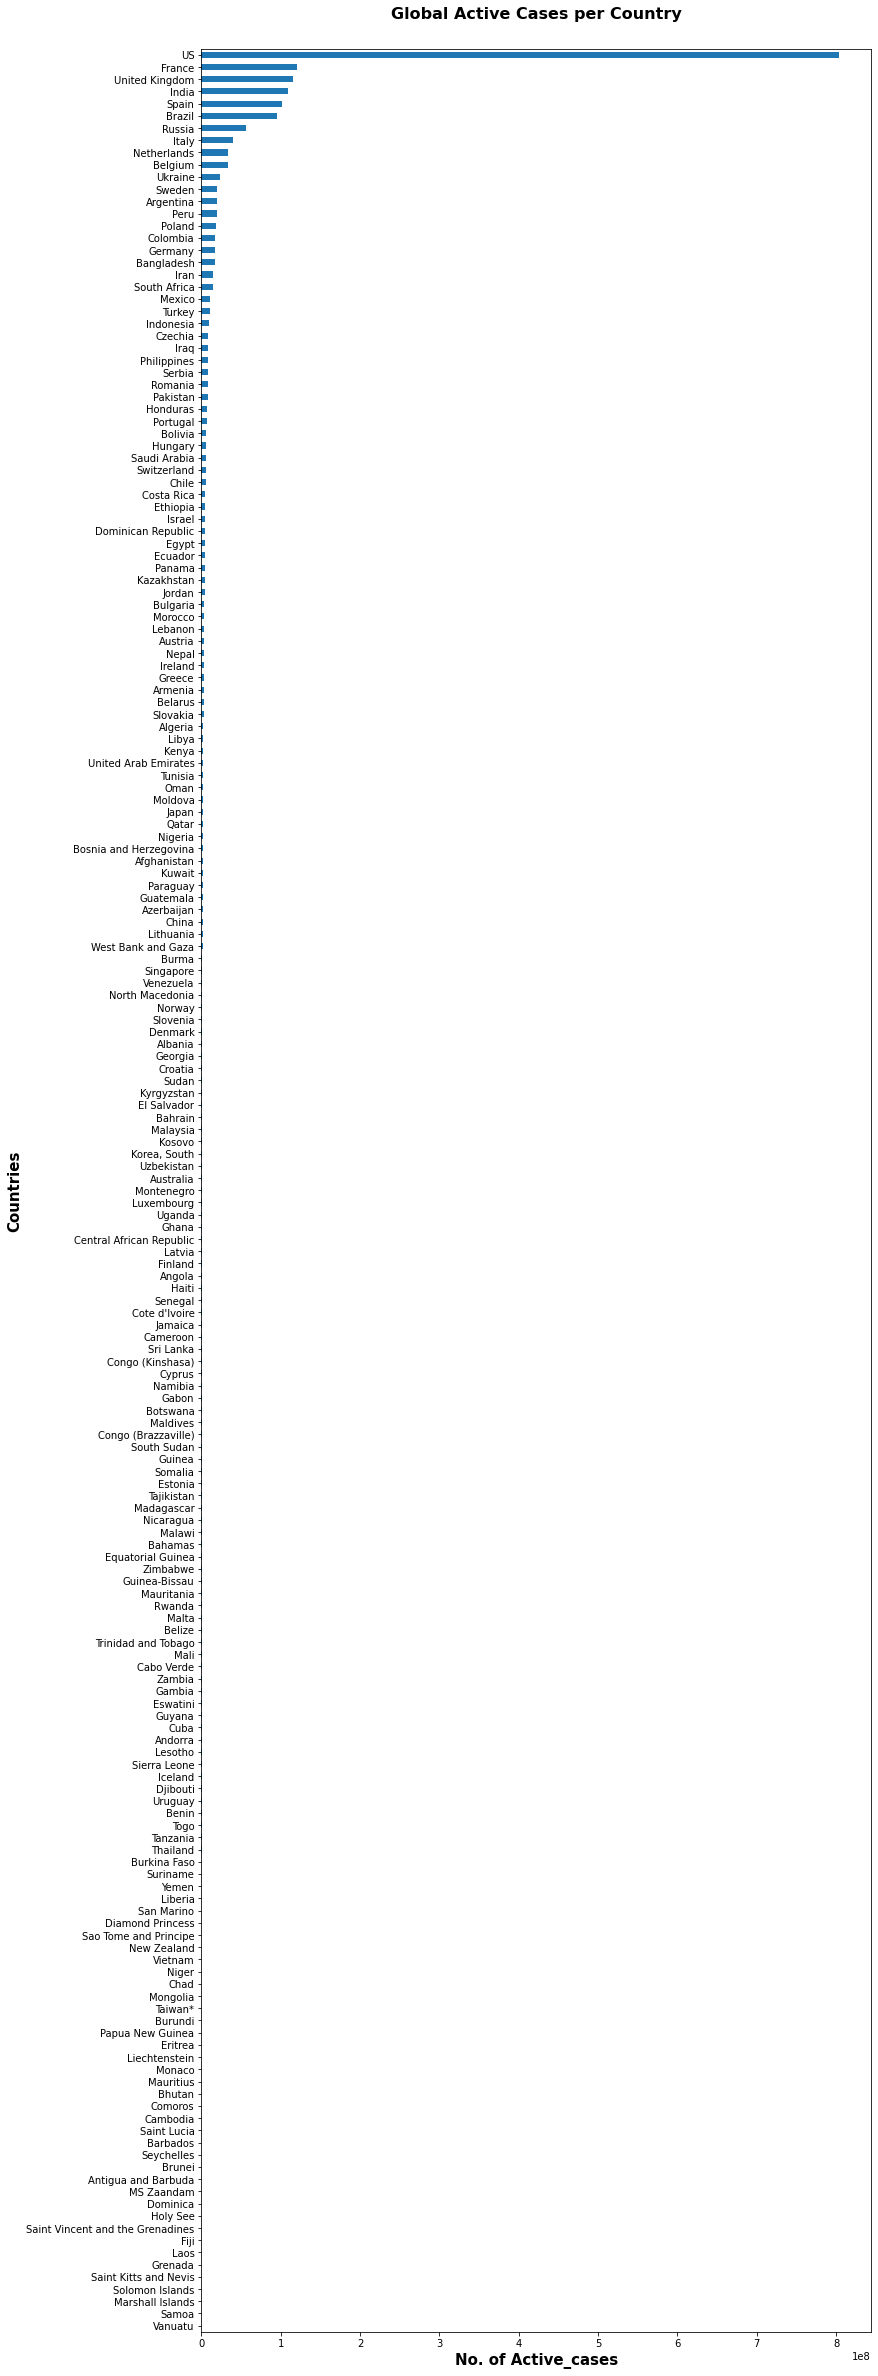

In [ ]:
plt.figure(figsize=(12,42))
dataset_final.groupby('Country')['Active_cases'].sum().sort_values().plot(kind='barh')
plt.title('Global Active Cases per Country', loc = 'center', pad= 30, fontsize=16, fontweight="bold")
plt.xlabel('No. of Active_cases', fontsize = 15, fontweight="bold")
plt.ylabel('Countries', fontsize = 15, fontweight="bold");

In [ ]:
# Global value count for first 30 countries
final_dataset_cointries = dataset_final['Country'].value_counts()
first_30 = final_dataset_cointries.head(30)
first_30

China                       9982
United Kingdom              3542
France                      3542
Australia                   2576
Netherlands                 1610
Denmark                      966
Bhutan                       322
Nepal                        322
Saudi Arabia                 322
Taiwan*                      322
Bahamas                      322
Burundi                      322
Dominican Republic           322
Sri Lanka                    322
Burkina Faso                 322
Poland                       322
Sierra Leone                 322
Liechtenstein                322
San Marino                   322
Bahrain                      322
Mauritius                    322
United Arab Emirates         322
El Salvador                  322
Seychelles                   322
Yemen                        322
Vietnam                      322
Solomon Islands              322
Central African Republic     322
Cameroon                     322
Singapore                    322
Name: Coun

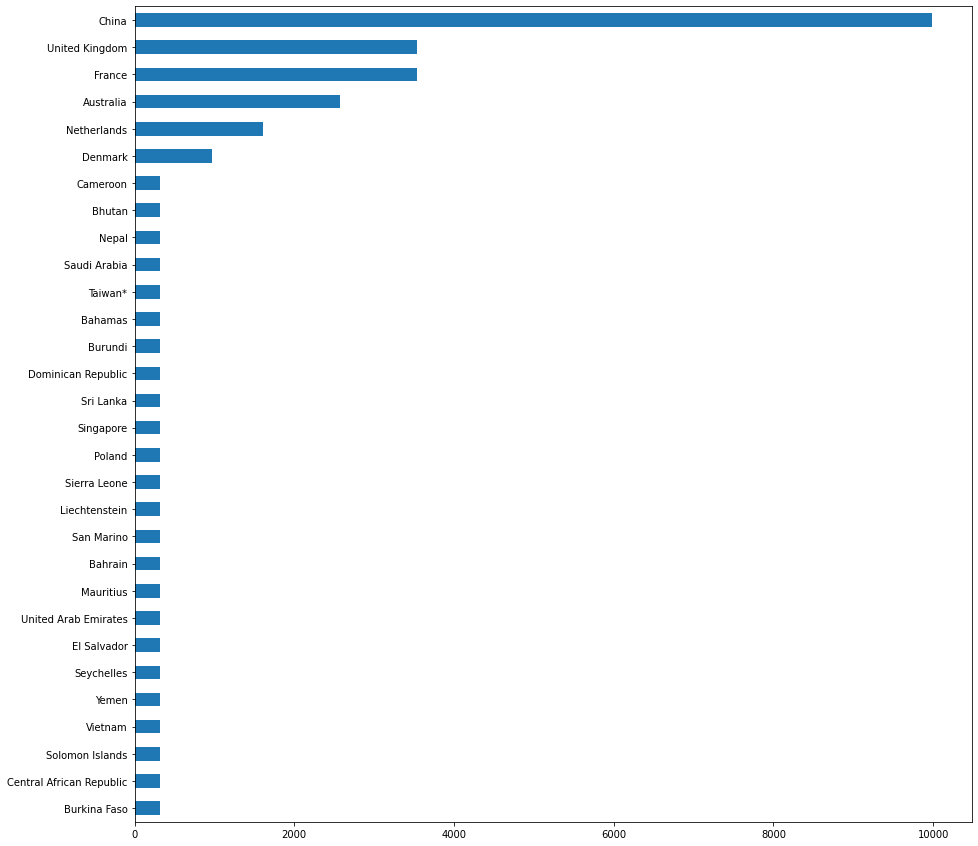

In [ ]:
plt.figure(figsize=(15,15))
first_30.sort_values().plot(kind ='barh');

In [ ]:
##visualising one country time series
germany_cases = (dataset_final['Country'] == 'Germany')

germany_df= dataset_final[germany_cases]
germany_df

Province  Country        Lat  ...  Deaths Recovered  Active_cases
114        NaN  Germany  51.165691  ...       0         0             0
364        NaN  Germany  51.165691  ...       0         0             0
614        NaN  Germany  51.165691  ...       0         0             0
864        NaN  Germany  51.165691  ...       0         0             0
1114       NaN  Germany  51.165691  ...       0         0             0
...        ...      ...        ...  ...     ...       ...           ...
79364      NaN  Germany  51.165691  ...   18577    831935        307002
79614      NaN  Germany  51.165691  ...   18839    852580        312221
79864      NaN  Germany  51.165691  ...   18989    868285        307276
80114      NaN  Germany  51.165691  ...   19434    888701        291871
80364      NaN  Germany  51.165691  ...   20002    909058        300209

[322 rows x 9 columns]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



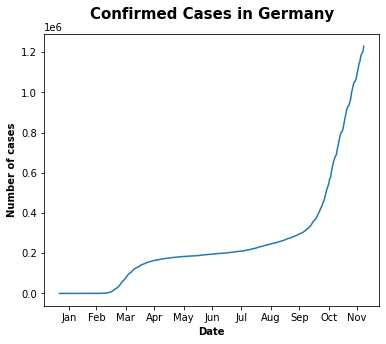

In [ ]:
# confirmed cases in Germany
plt.figure(figsize=(6,5))
germany_df['Date'] = pd.to_datetime(germany_df['Date'])
p = sns.lineplot(x='Date', y='Confirmed', data=germany_df, sort=False)
p.set(xticklabels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title('Confirmed Cases in Germany', loc = 'center' , pad= 15, fontsize=15, fontweight="bold")

plt.xlabel('Date', fontsize = 10,fontweight="bold", visible=True)
plt.ylabel('Number of cases', fontsize = 10, fontweight="bold");


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



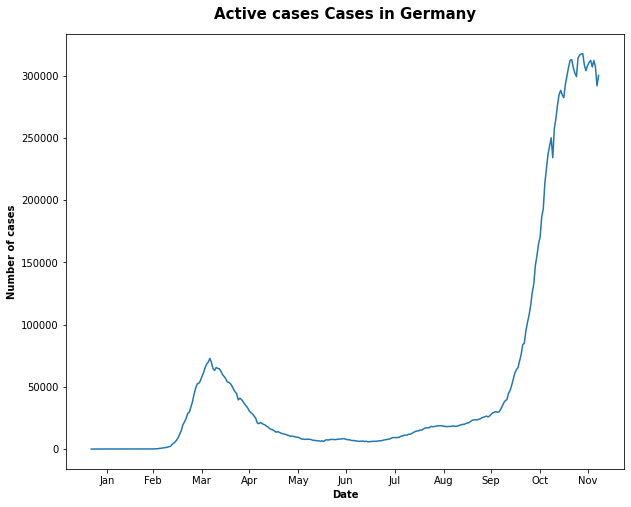

In [ ]:
# Active cases in Germany

plt.figure(figsize=(10,8))
germany_df['Date'] = pd.to_datetime(germany_df['Date'])
p = sns.lineplot(x='Date', y='Active_cases', data=germany_df, sort=False)
p.set(xticklabels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title('Active cases Cases in Germany', loc = 'center' , pad= 15, fontsize=15, fontweight="bold")

plt.xlabel('Date', fontsize = 10,fontweight="bold",visible=True)
plt.ylabel('Number of cases', fontsize = 10, fontweight="bold");

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



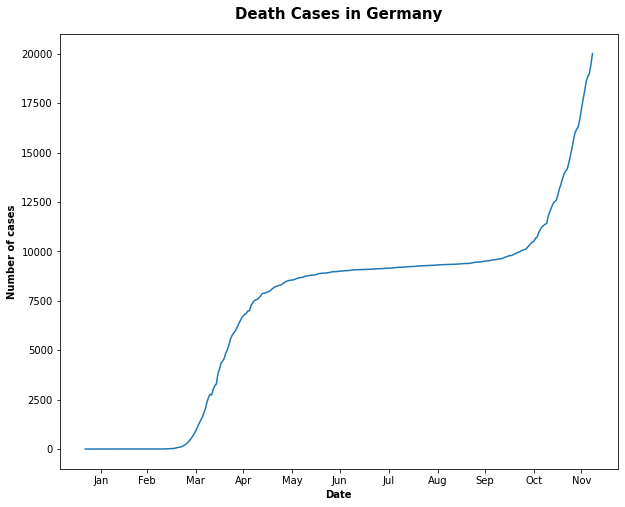

In [ ]:
# Deaths cases in Germany

plt.figure(figsize=(10,8))
germany_df['Date'] = pd.to_datetime(germany_df['Date'])
p = sns.lineplot(x='Date', y='Deaths', data=germany_df, sort=False)
p.set(xticklabels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title('Death Cases in Germany', loc = 'center' , pad= 15, fontsize=15, fontweight="bold")

plt.xlabel('Date', fontsize = 10,fontweight="bold",visible=True)
plt.ylabel('Number of cases', fontsize = 10, fontweight="bold");

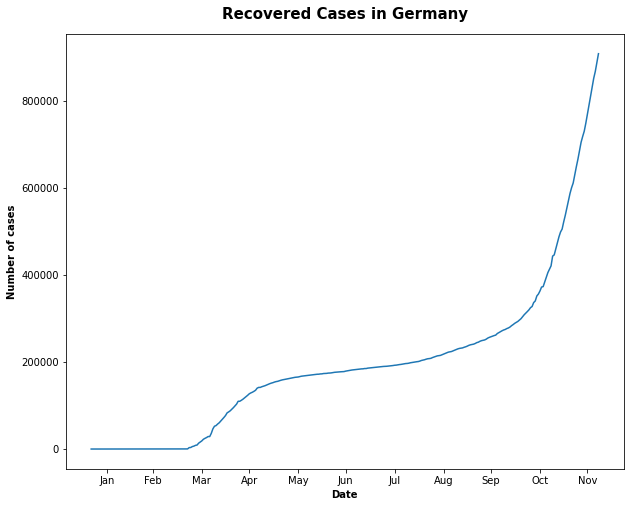

In [ ]:
# Recovered cases in Germany
plt.figure(figsize=(10,8))
#germany_df['Date'] = pd.to_datetime(germany_df['Date'])
p = sns.lineplot(x='Date', y='Recovered', data=germany_df, sort=False)
p.set(xticklabels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title('Recovered Cases in Germany', loc = 'center' , pad= 15, fontsize=15, fontweight="bold")

plt.xlabel('Date', fontsize = 10,fontweight="bold",visible=True)
plt.ylabel('Number of cases', fontsize = 10, fontweight="bold");

In [ ]:
regional_comparison = dataset_final[dataset_final.Country.isin(['Germany','Poland','Austria','Spain','Italy',])]
regional_comparison

Province  Country        Lat  ...  Deaths Recovered  Active_cases
16         NaN  Austria  47.516200  ...       0         0             0
114        NaN  Germany  51.165691  ...       0         0             0
133        NaN    Italy  41.871940  ...       0         0             0
188        NaN   Poland  51.919400  ...       0         0             0
212        NaN    Spain  40.463667  ...       0         0             0
...        ...      ...        ...  ...     ...       ...           ...
80266      NaN  Austria  47.516200  ...    4002    262314         41754
80364      NaN  Germany  51.165691  ...   20002    909058        300209
80383      NaN    Italy  41.871940  ...   61240    958629        737525
80438      NaN   Poland  51.919400  ...   20592    738845        316743
80462      NaN    Spain  40.463667  ...   46646    150376       1505306

[1610 rows x 9 columns]

In [ ]:
df_europe_region = regional_comparison.sort_values(by='Country', ascending=False)
df_europe_region

Province  Country        Lat  ...  Deaths Recovered  Active_cases
80462      NaN    Spain  40.463667  ...   46646    150376       1505306
18462      NaN    Spain  40.463667  ...   11947     34219         80002
21712      NaN    Spain  40.463667  ...   20002     74797         96040
70212      NaN    Spain  40.463667  ...   35466    150376        950661
21462      NaN    Spain  40.463667  ...   19315     74797         90836
...        ...      ...        ...  ...     ...       ...           ...
43516      NaN  Austria  47.516200  ...     709     17073          1239
43266      NaN  Austria  47.516200  ...     708     17000          1240
43016      NaN  Austria  47.516200  ...     708     16952          1237
42766      NaN  Austria  47.516200  ...     706     16864          1213
40266      NaN  Austria  47.516200  ...     705     16491           677

[1610 rows x 9 columns]

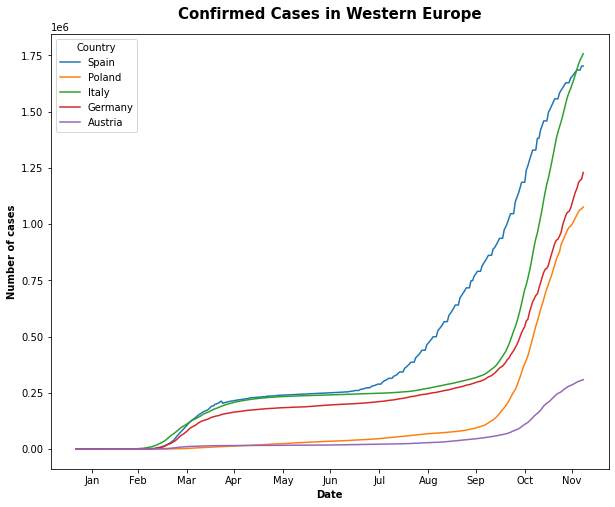

In [ ]:
# Confirmed cases in europe region
plt.figure(figsize=(10,8))
df_europe_region['Date'] = pd.to_datetime(df_europe_region['Date'])
p = sns.lineplot(x='Date', y='Confirmed', hue='Country', data=df_europe_region)
p.set(xticklabels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title('Confirmed Cases in Western Europe', loc = 'center' , pad= 15, fontsize=15, fontweight="bold")

plt.xlabel('Date', fontsize = 10,fontweight="bold",visible=True)
plt.ylabel('Number of cases', fontsize = 10, fontweight="bold");


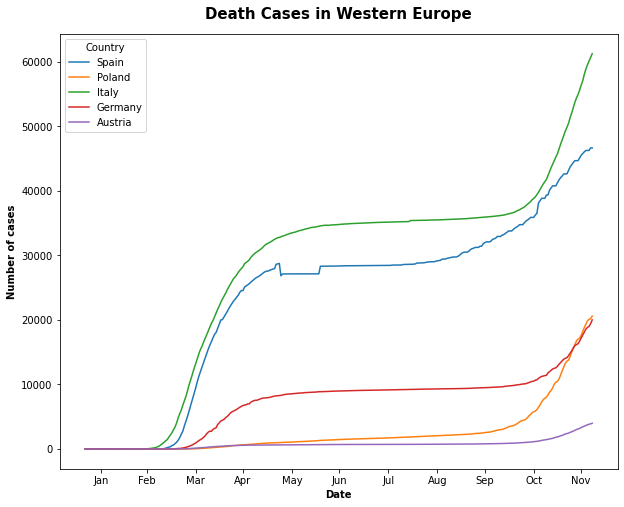

In [ ]:
# Death cases in europe region
plt.figure(figsize=(10,8))
df_europe_region['Date'] = pd.to_datetime(df_europe_region['Date'])
p = sns.lineplot(x='Date', y='Deaths', hue='Country', data=df_europe_region)
p.set(xticklabels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title('Death Cases in Western Europe', loc = 'center' , pad= 15, fontsize=15, fontweight="bold")

plt.xlabel('Date', fontsize = 10,fontweight="bold",visible=True)
plt.ylabel('Number of cases', fontsize = 10, fontweight="bold");


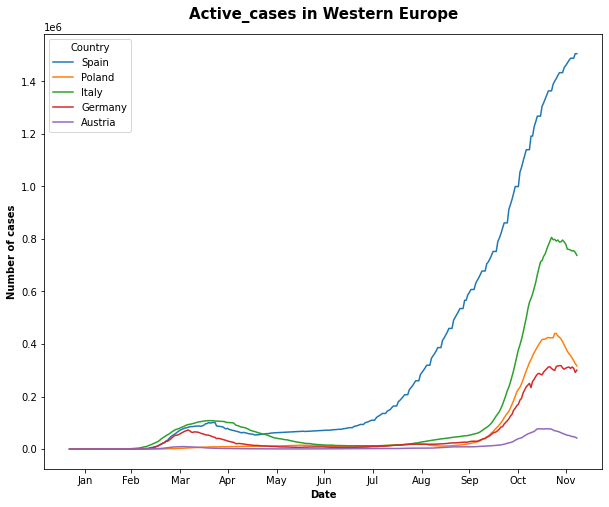

In [ ]:
# Active cases in europe region

plt.figure(figsize=(10,8))
df_europe_region['Date'] = pd.to_datetime(df_europe_region['Date'])
p = sns.lineplot(x='Date', y='Active_cases', hue='Country', data=df_europe_region)
p.set(xticklabels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title('Active_cases in Western Europe', loc = 'center' , pad= 15, fontsize=15, fontweight="bold")

plt.xlabel('Date', fontsize = 10,fontweight="bold",visible=True)
plt.ylabel('Number of cases', fontsize = 10, fontweight="bold");


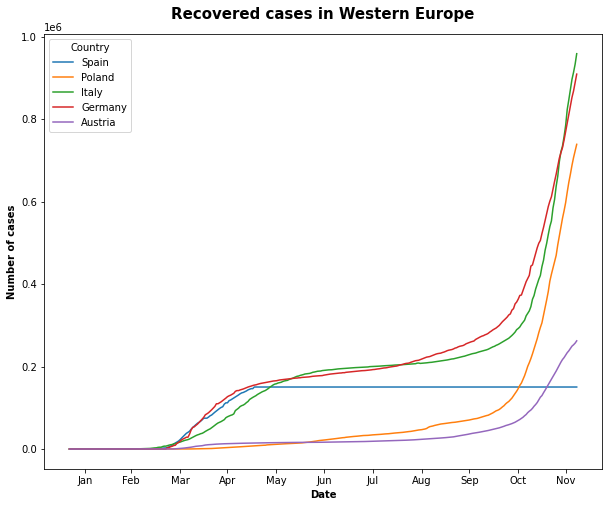

In [ ]:
# Recovered cases in europe region

plt.figure(figsize=(10,8))

df_europe_region['Date'] = pd.to_datetime(df_europe_region['Date'])
p = sns.lineplot(x='Date', y='Recovered', hue='Country', data=df_europe_region)
p.set(xticklabels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

plt.title('Recovered cases in Western Europe', loc = 'center' , pad= 15, fontsize=15, fontweight="bold")

plt.xlabel('Date', fontsize = 10,fontweight="bold",visible=True)
plt.ylabel('Number of cases', fontsize = 10, fontweight="bold");


In [ ]:
#Comparison of covid-19 cases in Germany and North America

continental_comparison = dataset_final[dataset_final.Country.isin(['Germany','Mexico','US',])]
continental_comparison

Province  Country        Lat  ...  Deaths Recovered  Active_cases
114        NaN  Germany  51.165691  ...       0         0             0
162        NaN   Mexico  23.634500  ...       0         0             0
226        NaN       US  40.000000  ...       0         0             1
364        NaN  Germany  51.165691  ...       0         0             0
412        NaN   Mexico  23.634500  ...       0         0             0
...        ...      ...        ...  ...     ...       ...           ...
80162      NaN   Mexico  23.634500  ...  110074    873555        198620
80226      NaN       US  40.000000  ...  283703   5714557       8951039
80364      NaN  Germany  51.165691  ...   20002    909058        300209
80412      NaN   Mexico  23.634500  ...  110874    881050        201331
80476      NaN       US  40.000000  ...  286249   5786915       9091995

[966 rows x 9 columns]

In [ ]:
germany_US_Mexico = continental_comparison.sort_values(by='Country')
germany_US_Mexico.sort_values(by='Country', ascending=False)

Province  Country        Lat  ...  Deaths Recovered  Active_cases
80476      NaN       US  40.000000  ...  286249   5786915       9091995
67226      NaN       US  40.000000  ...  218936   3197539       4619574
16726      NaN       US  40.000000  ...    2892      1072        120936
16476      NaN       US  40.000000  ...    2259       869        102165
16226      NaN       US  40.000000  ...    1741       681         84191
...        ...      ...        ...  ...     ...       ...           ...
45864      NaN  Germany  51.165691  ...    9110    189140          6631
45614      NaN  Germany  51.165691  ...    9102    188628          6546
65364      NaN  Germany  51.165691  ...    9599    273718         37178
45364      NaN  Germany  51.165691  ...    9099    188221          6397
114        NaN  Germany  51.165691  ...       0         0             0

[966 rows x 9 columns]

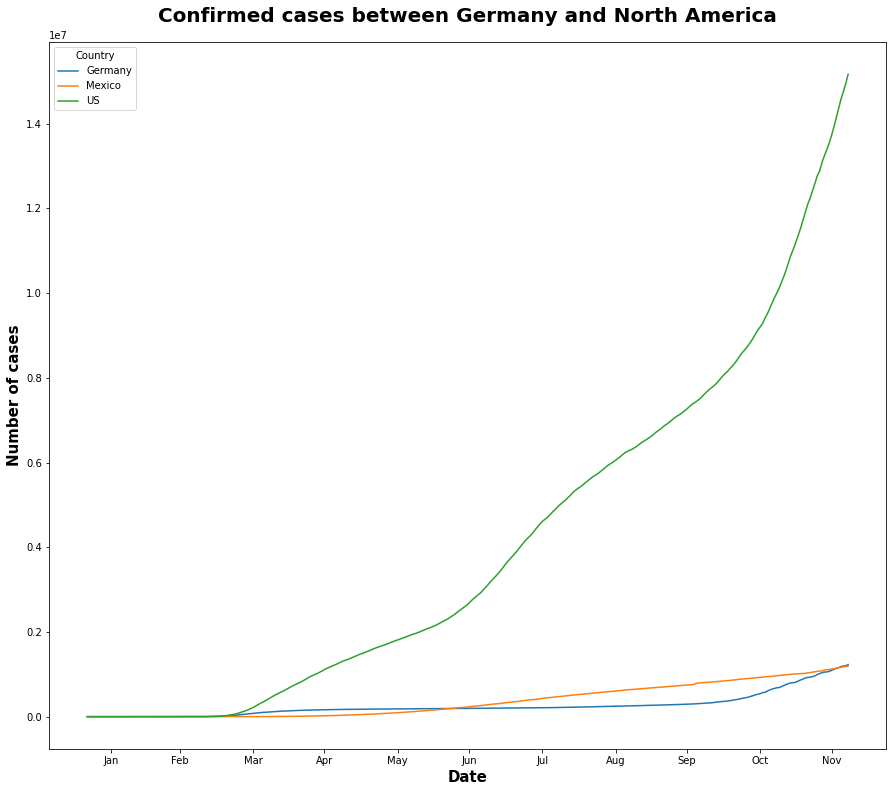

In [ ]:
plt.figure(figsize=(15,13))
germany_US_Mexico['Date'] = pd.to_datetime(germany_US_Mexico['Date'])
p = sns.lineplot(x='Date', y='Confirmed', hue='Country', data=germany_US_Mexico)
p.set(xticklabels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title('Confirmed cases between Germany and North America', loc = 'center' , pad= 20, fontsize=20, fontweight="bold")

plt.xlabel('Date', fontsize = 15,fontweight="bold",visible=True)
plt.ylabel('Number of cases', fontsize = 15, fontweight="bold");
